In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import sklearn as sl
import sklearn.metrics

In [2]:
print("Iteration 3 / 2.2 Data Description")

filePath = "train_strokes.xlsx"
raw_data = pd.read_excel(filePath)
pd.set_option('display.max_columns', None)

print(raw_data.shape)
print("Attributes are", raw_data.columns.values)
print(raw_data)

Iteration 3 / 2.2 Data Description
(43400, 12)
Attributes are ['id' 'gender' 'age' 'hypertension' 'heart_disease' 'ever_married'
 'work_type' 'Residence_type' 'avg_glucose_level' 'bmi' 'smoking_status'
 'stroke']
          id  gender   age  hypertension  heart_disease ever_married  \
0      30669    Male   3.0             0              0           No   
1      30468    Male  58.0             1              0          Yes   
2      16523  Female   8.0             0              0           No   
3      56543  Female  70.0             0              0          Yes   
4      46136    Male  14.0             0              0           No   
...      ...     ...   ...           ...            ...          ...   
43395  56196  Female  10.0             0              0           No   
43396   5450  Female  56.0             0              0          Yes   
43397  28375  Female  82.0             1              0          Yes   
43398  27973    Male  40.0             0              0          Ye

Iteration 3 / 2.3 Data exploration


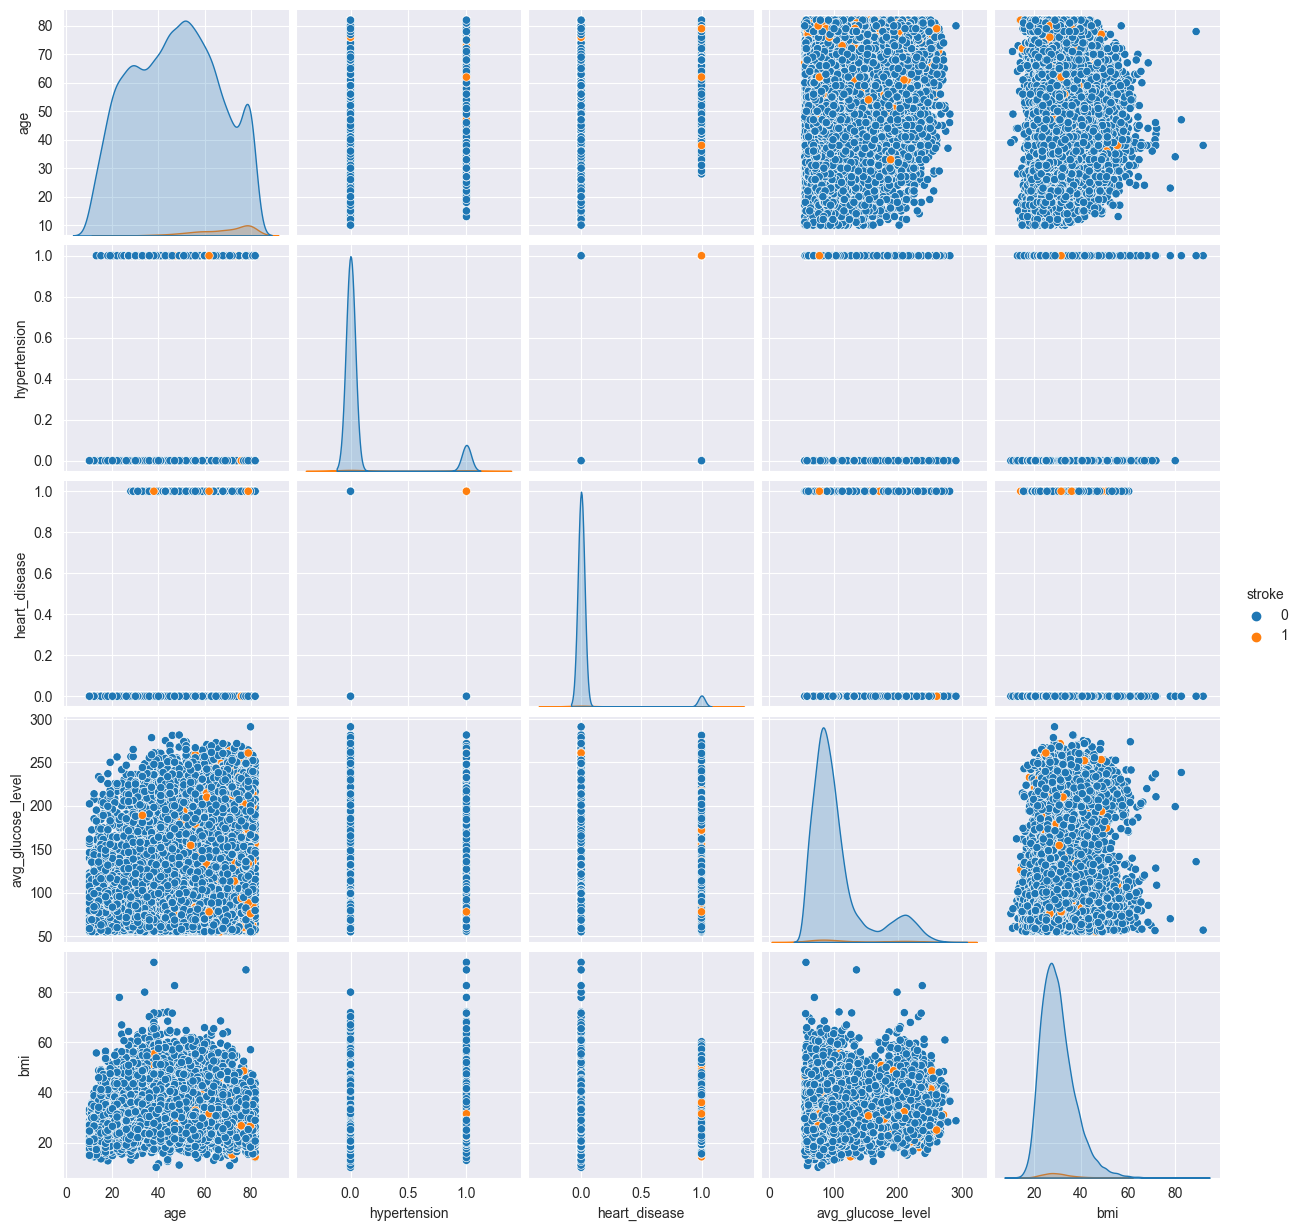

In [3]:
print("Iteration 3 / 2.3 Data exploration")
dataset_explore = raw_data.copy()
dataset_explore.dropna(axis=0, how='any', inplace=True)
dataset_explore = dataset_explore.drop(columns=['id'])


# Draw pairplot to show the relationship between
seaborn.pairplot(dataset_explore, hue='stroke')

/var/folders/xl/y162rqwx3hl6tfsd_fc2z51c0000gn/T/ipykernel_57582/2042289519.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = seaborn.heatmap(drop_id.corr(), cmap='coolwarm')


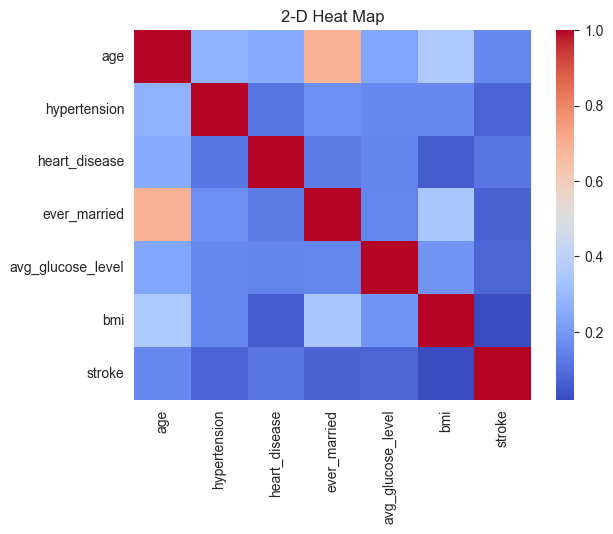

In [4]:
#Convert columns of a string to numbers
drop_id = raw_data.copy()
drop_id = drop_id.drop(columns=['id'])
columns = ['ever_married']
for column in columns:
    classes = drop_id[column].unique()
    for i in range(len(classes)):
        drop_id[column] = drop_id[column].replace(classes[i],i)

# draw heatmap between attributes
ax = seaborn.heatmap(drop_id.corr(), cmap='coolwarm')
plt.title("2-D Heat Map")
plt.show()

<AxesSubplot: xlabel='stroke', ylabel='age'>

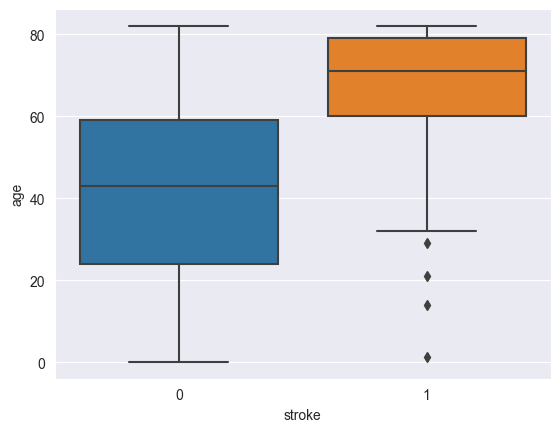

In [5]:
# Draw age and stroke boxplot
seaborn.boxplot(x=raw_data['stroke'],y=raw_data['age'])

<AxesSubplot: xlabel='stroke', ylabel='bmi'>

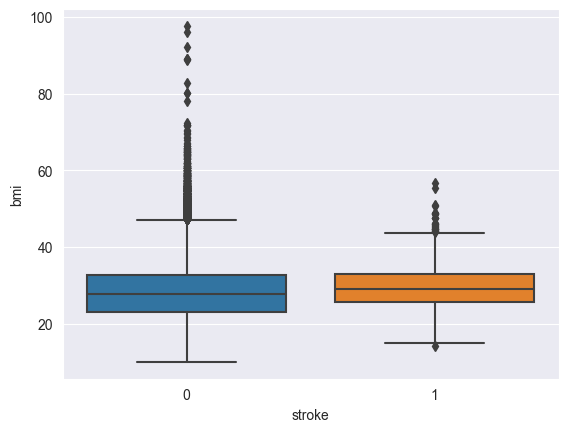

In [6]:
seaborn.boxplot(x=raw_data['stroke'],y=raw_data['bmi'])

In [7]:
#--------------------------------------------------------------------------------
print("Iteration 3 / 2.4 Data Quality")
# Completion (Missing data for each attributes)

# a变量用了isnull函数，返回值如果是false说明不是空值，如果是true就有空值
# missing_status with the isnull function, the return value if it is false means not null,
# if it is true then there is a null value
missing_status = pd.isnull(raw_data)
# any函数，就是对每个列去找有没有TRUE，true也就是存在空值，结果是全FALSE
# any, that is, for each column to find whether there is TRUE, true that is,
# the existence of null values
print(missing_status.any())

Iteration 3 / 2.4 Data Quality
id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status        True
stroke               False
dtype: bool


In [8]:
remove_missing_data = raw_data.copy()
remove_missing_data.dropna(axis=0, how='any', inplace=True)
missing_bmi = missing_status[missing_status['bmi']==True]
missing_smoke = missing_status[missing_status['smoking_status']==True]

In [9]:
print('There are' ,missing_bmi.shape[0],'missing data in bmi.')
print('There are' ,missing_smoke.shape[0],'missing data in smoking.')
print('There are' ,raw_data.shape[0]-remove_missing_data.shape[0],'missing data in the raw data.')

There are 1462 missing data in bmi.
There are 13292 missing data in smoking.
There are 14328 missing data in the raw data.


In [10]:
# calculate outliers
threshold = 3
zscore_data = raw_data.copy()
zscore_data = zscore_data.drop(columns=['id'])
for col in ['age', 'avg_glucose_level', 'bmi']:
    series = zscore_data[col]
    zscore = (series - series.mean()) / series.std()
    zscore_data[col] = zscore.abs() > threshold

In [11]:
outlier_age = zscore_data[zscore_data['age']==True]
outlier_bmi = zscore_data[zscore_data['bmi']==True]
outlier_ave_glucose = zscore_data[zscore_data['avg_glucose_level']==True]
print('There are' ,outlier_age.shape[0],'outlier data in age.')
print('There are' ,outlier_bmi.shape[0],'outlier data in bmi.')
print('There are' ,outlier_ave_glucose.shape[0],'outlier data in avg_glucose_level.')

There are 0 outlier data in age.
There are 412 outlier data in bmi.
There are 645 outlier data in avg_glucose_level.


In [12]:
# Draw stroke distribution
raw_data_stroke = raw_data[raw_data['stroke']==1]
raw_data_healthy = raw_data[raw_data['stroke']==0]
num_stroke = len(raw_data_stroke)
num_healthy = len(raw_data_healthy)

print("There are",num_stroke,"records are marked stroke.")
print("There are",num_healthy,"records are marked as healthy (non-stroke).")

There are 783 records are marked stroke.
There are 42617 records are marked as healthy (non-stroke).


<AxesSubplot: >

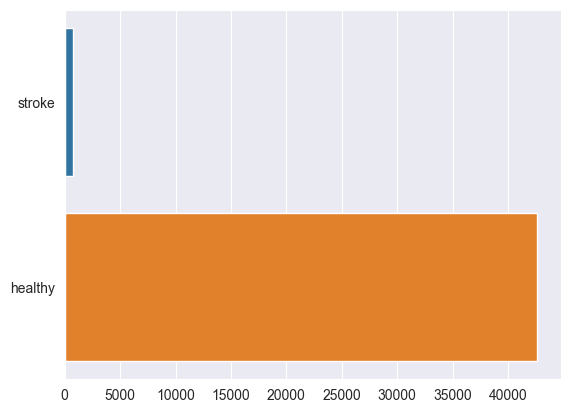

In [13]:
# plt.bar(['stroke','healthy'],[num_stroke,num_healthy])
# plt.show()
seaborn.barplot(y=['stroke','healthy'],x=[num_stroke,num_healthy],orient='horizon')

Solve imbalance
1. use imblearn package
2. use weighted loss function